In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import matplotlib.pyplot as plt

from pyGDM2 import (core, propagators, fields, 
                    materials, linear, structures, 
                    tools, visu)

In [23]:
NUM_WAVELENGTH_SAMPLES = 100
STEP = 10
NUM_VAR_SAMPLES = 5
wl = np.linspace(400, 1000, NUM_WAVELENGTH_SAMPLES)

In [24]:
def uvvis(wl, shape, geom, medium):
        if shape=='sphere':
            geometry = structures.sphere(STEP, **geom)
            
        elif shape=='cylinder':
            geometry = structures.nanorod(STEP, **geom)
            
        else:
            raise RuntimeError('Shape %s is not recognized'%shape)
        struct = structures.struct(STEP, geometry, 
            materials.gold(), verbose=False)
            
        
        field_generator = fields.plane_wave
        kwargs = dict(theta=0, inc_angle=180)
        efield = fields.efield(field_generator,
                       wavelengths=wl, kwargs=kwargs)

        dyads = propagators.DyadsQuasistatic123(**medium)
        sim = core.simulation(struct, efield, dyads)
        sim.scatter(verbose=False)
        field_kwargs = tools.get_possible_field_params_spectra(sim)
        config_idx = 0
        _, spectrum = tools.calculate_spectrum(sim,
                            field_kwargs[config_idx], linear.extinct)
        
        abs_ = spectrum.T[2]/np.max(spectrum.T[2])
                
        return abs_ 

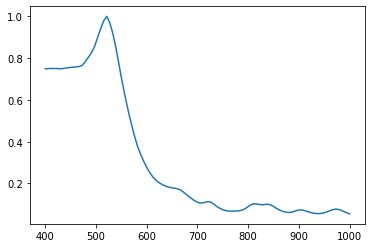

In [25]:
abs_ = uvvis(wl , 'sphere', geom={'R':50/STEP, 'mesh':'hex'}, medium={'n1':1, 'n2':1})
plt.plot(wl, abs_)

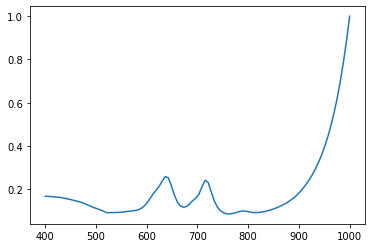

In [28]:
abs_ = uvvis(wl, 'cylinder', geom={'R':10/STEP, 'L': 400/STEP, 'mesh':'hex'}, medium={'n1':1, 'n2':1})
plt.plot(wl, abs_)